# MNIST Neural Network From Scratch

The goal of this short project is to train a neural network, using the MNIST dataset, using only linear algebra via Numpy. The MNIST dataset is a collection of 28x28 handwritten digits with corresponding integer values for the represented digit. The model as currently constructed can correctly identify about 90% of hand drawn digits. Using actual data science modules, accuracy well over 98% can be achieved. The data for this project can be accessed __[Here](http://yann.lecun.com/exdb/mnist/)__.

In [102]:
#Import Modules
import numpy as np
#numpy for all data proccessing and modeling
from matplotlib import pyplot as plt
#Pyplot for image generation
from keras.datasets import mnist
#Mnist for loading dataset

In [103]:
#Load adn Reshape data to have 60000 columns of 784 nodes
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = np.reshape(train_X, (60000, 784))
test_X = np.reshape(test_X, (10000, 784))
m, n = train_X.shape
train_X = train_X.T
test_X = test_X.T

Text(0.5, 0.8, 'Sample of dataset Images and Values')

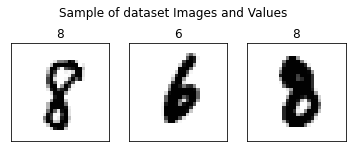

In [104]:
nums = np.random.randint(0, 59999, 3)
plt.figure(1)
plt.subplot(131)
plt.imshow(train_X[:,nums[0]].reshape(28,28), cmap='Greys')
plt.yticks([])
plt.xticks([])
plt.title(train_y[nums[0]])
plt.subplot(132)
plt.imshow(train_X[:,nums[1]].reshape(28,28), cmap='Greys')
plt.title(train_y[nums[1]])
plt.yticks([])
plt.xticks([])
plt.subplot(133)
plt.imshow(train_X[:,nums[2]].reshape(28,28), cmap='Greys')
plt.title(train_y[nums[2]])
plt.yticks([])
plt.xticks([])
plt.suptitle("Sample of dataset Images and Values", y=.8)

This project uses the sigmoid function as the activator and uses the softmax fuction to generate probabilities and thus predicitons.

Sigmoid Function:
$$
 h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-P} }  
$$

Softmax Function:
$$
\sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

In [105]:
def sigmoid(Z):
    return (1/(1+np.exp(-Z)))
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def sigmoid_deriv(Z):
    dsig = (np.exp(-Z))/((np.exp(-Z)+1)**2)
    dsig = np.nan_to_num(dsig)
    return dsig
def y_col_arr(Y):
    y_col_array = np.zeros((Y.size, Y.max() + 1))
    y_col_array[np.arange(Y.size), Y] = 1
    y_col_array = y_col_array.T
    return y_col_array
def get_predictions(A3, Y):
    predictions = np.argmax(A3,0)
    print('Predictions:')
    print(predictions)
    print('Solutions:')
    print(Y)
    return np.sum(predictions == Y)/ Y.size

In [106]:
def init_params():
    W1 = np.random.rand(72, 784) - 0.5
    b1 = np.random.rand(72, 1) - 0.5
    W2 = np.random.rand(36, 72) - 0.5
    b2 = np.random.rand(36, 1) - 0.5
    W3 = np.random.rand(10, 36) - 0.5
    b3 = np.random.rand(10, 1,) - 0.5
    return (W1, b1, W2, b2, W3, b3)

In [107]:
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    return (Z1, A1, Z2, A2, P3, A3)

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    y_col_arr_Y = y_col_arr(Y)
    dZ3 = A3 - y_col_arr_Y
    dW3 = 1/m * dZ3.dot(A2.T)
    db3 = 1/m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * sigmoid_deriv(Z2)
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)  
    return (dW1, db1, dW2, db2, dW3, db3)

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return (W1, b1, W2, b2, W3, b3)

In [108]:
def gradient_decent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 5 == 0:
            print("Iterations: ", i)
            predictions = get_predictions(A3, Y)
            print(str(predictions*100) + '%')
    return (W1, b1, W2, b2, W3, b3)

In [109]:
W1, b1, W2, b2, W3, b3 = gradient_decent(train_X, train_y, 1, 500)

<ipython-input-105-ca566d39b640>:2: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-Z)))
<ipython-input-105-ca566d39b640>:7: RuntimeWarning: overflow encountered in exp
  dsig = (np.exp(-Z))/((np.exp(-Z)+1)**2)
<ipython-input-105-ca566d39b640>:7: RuntimeWarning: overflow encountered in square
  dsig = (np.exp(-Z))/((np.exp(-Z)+1)**2)
<ipython-input-105-ca566d39b640>:7: RuntimeWarning: invalid value encountered in divide
  dsig = (np.exp(-Z))/((np.exp(-Z)+1)**2)


Iterations:  0
Predictions:
[0 4 1 ... 1 1 1]
Solutions:
[5 0 4 ... 5 6 8]
11.206666666666667%
Iterations:  5
Predictions:
[0 0 6 ... 9 1 6]
Solutions:
[5 0 4 ... 5 6 8]
34.836666666666666%


KeyboardInterrupt: 

In [50]:
Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, test_X)
prediction = get_predictions(A3, test_y)
print(prediction)

Predictions:
[7 2 1 ... 4 5 6]
Solutions:
[7 2 1 ... 4 5 6]
0.9089


<ipython-input-33-b85be6990001>:11: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-P)))
